In [94]:
# DATA_PATH=r'..\data\raw\dataframe.pickle'
DATA_PATH=r'..\data\raw\ratings_Electronics (1).csv'

In [95]:
import numpy as np
import pandas as pd
import pickle 
import matplotlib.pyplot as plt
import seaborn as sns


In [96]:
df=pd.read_csv(DATA_PATH)
df.columns=["User_ID",'Product_ID','Ratings','Time_Stamp']
df

,User_ID,Product_ID,Ratings,Time_Stamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600
...,...,...,...,...
7824476,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824477,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824478,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824479,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200


In [97]:
print(df.Ratings.unique())
print(df.Ratings.value_counts())
count_ratings=pd.DataFrame(df.Ratings.value_counts().reset_index())
count_ratings.columns=['ratings','count']
count_ratings

[5. 1. 3. 2. 4.]
Ratings
5.0    4347540
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: count, dtype: int64


,ratings,count
0,5.0,4347540
1,4.0,1485781
2,1.0,901765
3,3.0,633073
4,2.0,456322


So more than half of reviews are 5


C:\Users\Mohamed Mosaad\AppData\Local\Temp\ipykernel_13756\3751074481.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=count_ratings,x='ratings',y='count',palette='viridis')


<Axes: xlabel='ratings', ylabel='count'>

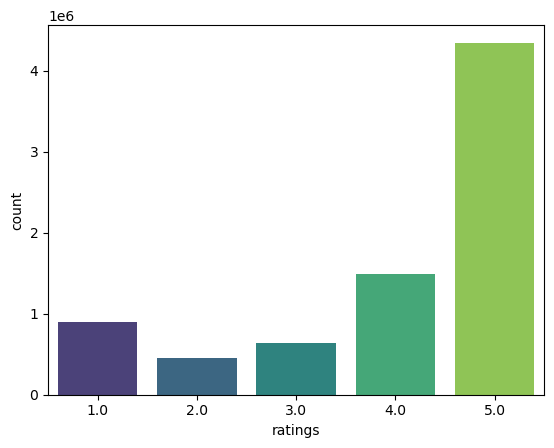

In [98]:
sns.barplot(data=count_ratings,x='ratings',y='count',palette='viridis')

HOW many id`s for 

In [99]:
print('Total number of reviews :',df.shape[0])
print('Total number of ID`s :',len(df.User_ID.unique()))
print('Total number of products :',len(df.Product_ID.unique()))

Total number of reviews : 7824481
Total number of ID`s : 4201696
Total number of products : 476001


num of reviews for every id

In [100]:
reviews_id_df=df.groupby('User_ID')["Ratings"].count().sort_values(ascending=False).reset_index()

In [101]:
reviews_id_df

,User_ID,Ratings
0,A5JLAU2ARJ0BO,520
1,ADLVFFE4VBT8,501
2,A3OXHLG6DIBRW8,498
3,A6FIAB28IS79,431
4,A680RUE1FDO8B,406
...,...,...
4201691,A2HRB8UOXH92SQ,1
4201692,A2HRBA4HO2E4GU,1
4201693,A2HRBCM00IDK56,1
4201694,A2HRBEBDTIB8MT,1


In [102]:
reviews_id_df.describe()

,Ratings
count,4.201696e+06
mean,1.862220e+00
std,2.885110e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,5.200000e+02


In [103]:
quantiles = reviews_id_df.quantile(np.arange(0,1.01,0.01), interpolation='higher')
quantiles

,User_ID,Ratings
0.00,A00000262KYZUE4J55XGL,1
0.01,A117JBZDNFLBRR,1
0.02,A12L0WRMGT76PW,1
0.03,A13XW60VN84L8U,1
0.04,A15B1P9TKTCFK5,1
...,...,...
0.96,AUIWX3GKDAROE,6
0.97,AVW24P2PF2BN9,7
0.98,AX98Z5FNCAN33,8
0.99,AYMJF9NMGLKOW,12


Text(0.5, 1.0, 'number of ratings per ids')

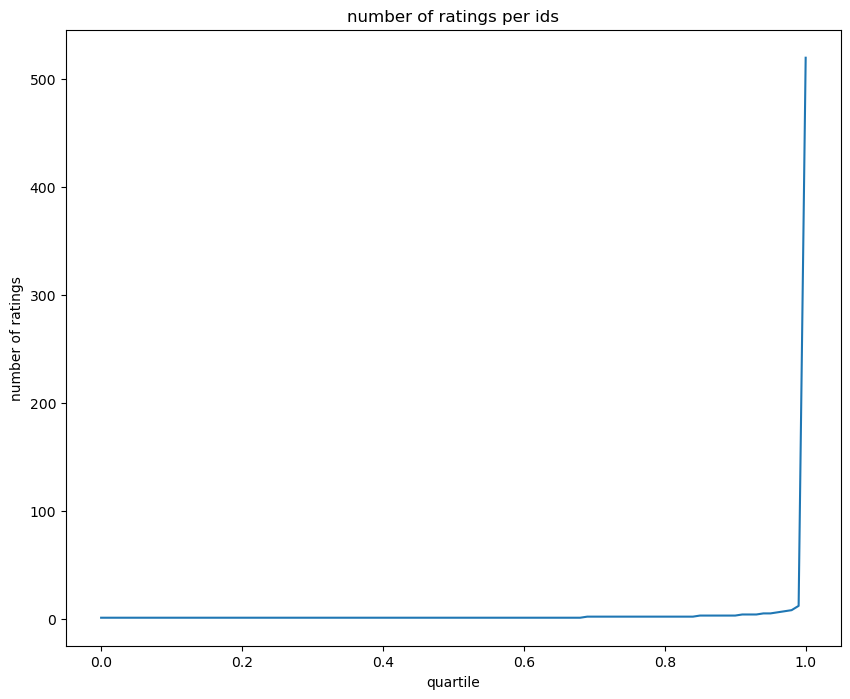

In [105]:
plt.figure(figsize=(10,8))
plt.plot(quantiles.index,quantiles.Ratings)
plt.xlabel("quartile")
plt.ylabel('number of ratings')
plt.title('number of ratings per ids')

In [126]:
(reviews_id_df.Ratings>50).sum()

1466

CUTOFF ALL ID`s THAT HAVE RATINGS LESS THAN 50

In [123]:
RATING_CUTOFF=50
new_df=df.groupby("User_ID").filter(lambda x:x["Ratings"].count()>RATING_CUTOFF)

In [124]:
new_df

,User_ID,Product_ID,Ratings,Time_Stamp
117,AT09WGFUM934H,0594481813,3.0,1377907200
176,A32HSNCNPRUMTR,0970407998,1.0,1319673600
177,A17HMM1M7T9PJ1,0970407998,4.0,1281744000
491,A3CLWR1UUZT6TG,0972683275,5.0,1373587200
630,A3TAS1AG6FMBQW,0972683275,5.0,1353456000
...,...,...,...,...
7824425,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0,1405641600
7824426,A2NYK9KWFMJV4Y,B00LGQ6HL8,5.0,1405209600
7824435,A3AYSYSLHU26U9,B00LI4ZZO8,4.0,1405296000
7824437,A2NYK9KWFMJV4Y,B00LI4ZZO8,5.0,1405209600


In [127]:
len(new_df.User_ID.unique())

1466

2-num of products for all clients

In [78]:
products_per_client=df.groupby(by='User_ID')["Product_ID"].count().sort_values(ascending=False).reset_index()
products_per_client

,User_ID,Product_ID
0,A5JLAU2ARJ0BO,520
1,ADLVFFE4VBT8,501
2,A3OXHLG6DIBRW8,498
3,A6FIAB28IS79,431
4,A680RUE1FDO8B,406
...,...,...
4201691,A2HRB8UOXH92SQ,1
4201692,A2HRBA4HO2E4GU,1
4201693,A2HRBCM00IDK56,1
4201694,A2HRBEBDTIB8MT,1


In [40]:
products_per_client.describe()

,Product_ID
count,958796.000000
mean,1.224110
std,0.843707
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,85.000000


In [43]:
(products_per_client.Product_ID!=reviews_id_df.Ratings).sum()

0

In [93]:
# products_per_client.Product_ID.loc[1000]

59

3-Relation between  number of ratings for every product 

In [44]:
df.columns

Index(['User_ID', 'Product_ID', 'Ratings', 'Time_Stamp'], dtype='object')

In [79]:
num_rating_per_product=df.groupby('Product_ID')['Ratings'].count().sort_values(ascending=False).reset_index()

In [80]:
num_rating_per_product

,Product_ID,Ratings
0,B0074BW614,18244
1,B00DR0PDNE,16454
2,B007WTAJTO,14172
3,B0019EHU8G,12285
4,B006GWO5WK,12226
...,...,...
475996,B004WL91KI,1
475997,B004WL9FK4,1
475998,B004WL9Q2Q,1
475999,B004WL9R8O,1


In [81]:
num_rating_per_product.describe()

,Ratings
count,476001.000000
mean,16.437951
std,112.702749
min,1.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,18244.000000


In [82]:
quantiles2 = num_rating_per_product.quantile(np.arange(0,1.01,0.01), interpolation='higher')
quantiles2

,Product_ID,Ratings
0.00,0321732944,1
0.01,B00004Z68M,1
0.02,B0000668YQ,1
0.03,B00007E8B1,1
0.04,B00009W45U,1
...,...,...
0.96,B00GU18GD6,69
0.97,B00HFI4420,92
0.98,B00I48SNMC,135
0.99,B00J49ZH56,246


Text(0.5, 1.0, 'number of ratings per quartile product')

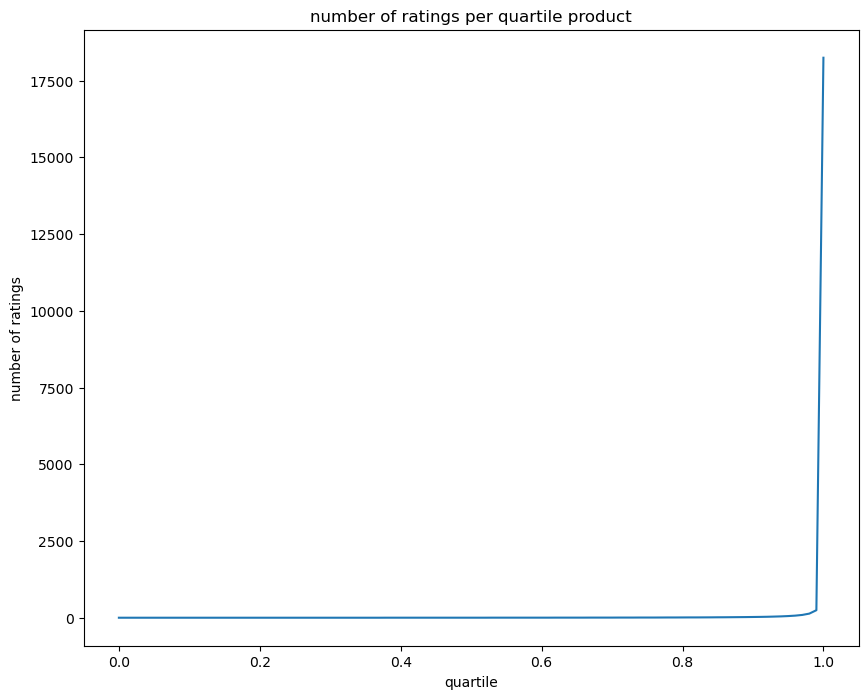

In [83]:
plt.figure(figsize=(10,8))
plt.plot(quantiles2.index,quantiles2.Ratings)
plt.xlabel("quartile")
plt.ylabel('number of ratings')
plt.title('number of ratings per quartile product')

In [87]:
(num_rating_per_product.Ratings>5).sum()

139176

CUTOFF ALL PRODUCTS THAT HAVE RATINGS LESS THAN 50

In [130]:
RATING_CUTOFF=5
new_df=new_df.groupby("Product_ID").filter(lambda x:x['Ratings'].count() >=RATING_CUTOFF)

In [131]:
new_df

,User_ID,Product_ID,Ratings,Time_Stamp
1309,A3LDPF5FMB782Z,1400501466,5.0,1336003200
1321,A1A5KUIIIHFF4U,1400501466,1.0,1332547200
1334,A2XIOXRRYX0KZY,1400501466,3.0,1371686400
1450,AW3LX47IHPFRL,1400501466,5.0,1339804800
1455,A1E3OB6QMBKRYZ,1400501466,1.0,1350086400
...,...,...,...,...
7824422,A34BZM6S9L7QI4,B00LGQ6HL8,5.0,1405555200
7824423,A1G650TTTHEAL5,B00LGQ6HL8,5.0,1405382400
7824424,A25C2M3QF9G7OQ,B00LGQ6HL8,5.0,1405555200
7824425,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0,1405641600


In [132]:
new_df.shape

(62893, 4)

In [133]:
new_df.Ratings.astype('int32')

1309       5
1321       1
1334       3
1450       5
1455       1
          ..
7824422    5
7824423    5
7824424    5
7824425    5
7824426    5
Name: Ratings, Length: 62893, dtype: int32

In [134]:
new_df.Ratings.value_counts()

Ratings
5.0    34863
4.0    17543
3.0     6290
2.0     2425
1.0     1772
Name: count, dtype: int64

In [137]:
print('num of unique products ' ,len(new_df.Product_ID.unique()))

num of unique products  5523


In [138]:
print('num of unique ID`s' ,len(new_df.User_ID.unique()))

num of unique ID`s 1466


In [139]:
new_df

,User_ID,Product_ID,Ratings,Time_Stamp
1309,A3LDPF5FMB782Z,1400501466,5.0,1336003200
1321,A1A5KUIIIHFF4U,1400501466,1.0,1332547200
1334,A2XIOXRRYX0KZY,1400501466,3.0,1371686400
1450,AW3LX47IHPFRL,1400501466,5.0,1339804800
1455,A1E3OB6QMBKRYZ,1400501466,1.0,1350086400
...,...,...,...,...
7824422,A34BZM6S9L7QI4,B00LGQ6HL8,5.0,1405555200
7824423,A1G650TTTHEAL5,B00LGQ6HL8,5.0,1405382400
7824424,A25C2M3QF9G7OQ,B00LGQ6HL8,5.0,1405555200
7824425,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0,1405641600


In [141]:
import datetime

new_df['date_time'] = pd.to_datetime(new_df['Time_Stamp'], unit='s')

# Extract year and month
new_df['year'] = new_df['date_time'].dt.year
new_df['month'] = new_df['date_time'].dt.month

In [142]:
new_df

,User_ID,Product_ID,Ratings,Time_Stamp,date_time,year,month
1309,A3LDPF5FMB782Z,1400501466,5.0,1336003200,2012-05-03,2012,5
1321,A1A5KUIIIHFF4U,1400501466,1.0,1332547200,2012-03-24,2012,3
1334,A2XIOXRRYX0KZY,1400501466,3.0,1371686400,2013-06-20,2013,6
1450,AW3LX47IHPFRL,1400501466,5.0,1339804800,2012-06-16,2012,6
1455,A1E3OB6QMBKRYZ,1400501466,1.0,1350086400,2012-10-13,2012,10
...,...,...,...,...,...,...,...
7824422,A34BZM6S9L7QI4,B00LGQ6HL8,5.0,1405555200,2014-07-17,2014,7
7824423,A1G650TTTHEAL5,B00LGQ6HL8,5.0,1405382400,2014-07-15,2014,7
7824424,A25C2M3QF9G7OQ,B00LGQ6HL8,5.0,1405555200,2014-07-17,2014,7
7824425,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0,1405641600,2014-07-18,2014,7


In [145]:
new_df.drop(columns=['Time_Stamp'],inplace=True,axis=1)

In [146]:
new_df.drop(columns=['date_time'],inplace=True,axis=1)

In [147]:
new_df

,User_ID,Product_ID,Ratings,year,month
1309,A3LDPF5FMB782Z,1400501466,5.0,2012,5
1321,A1A5KUIIIHFF4U,1400501466,1.0,2012,3
1334,A2XIOXRRYX0KZY,1400501466,3.0,2013,6
1450,AW3LX47IHPFRL,1400501466,5.0,2012,6
1455,A1E3OB6QMBKRYZ,1400501466,1.0,2012,10
...,...,...,...,...,...
7824422,A34BZM6S9L7QI4,B00LGQ6HL8,5.0,2014,7
7824423,A1G650TTTHEAL5,B00LGQ6HL8,5.0,2014,7
7824424,A25C2M3QF9G7OQ,B00LGQ6HL8,5.0,2014,7
7824425,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0,2014,7


In [148]:
new_df.year.unique()

array([2012, 2013, 2011, 2010, 2014, 2005, 2007, 2006, 2004, 2003, 2002,
       2008, 2009, 2001, 2000])

In [150]:
new_df.groupby('month')["User_ID"].count()

month
1     5653
2     5054
3     5529
4     5694
5     5408
6     5408
7     4950
8     4318
9     4327
10    4627
11    5664
12    6261
Name: User_ID, dtype: int64

In [151]:
new_df.groupby('year')["User_ID"].count()

year
2000       11
2001       33
2002       59
2003      104
2004      115
2005      245
2006      507
2007      896
2008     2322
2009     4284
2010     5423
2011     8117
2012    12017
2013    19054
2014     9706
Name: User_ID, dtype: int64

In [154]:
new_df.groupby('User_ID')["Ratings"].mean().sort_values(ascending=False)

User_ID
A194Y47BF3CUTJ    5.000000
A2TN0U8173HM7A    5.000000
AA91O96C1Z18W     5.000000
A1KWPIORLG2QV     5.000000
A292TRC6DX2GKK    5.000000
                    ...   
A2AEZQ3DGBBLPR    2.470588
AUCISQA1YXX86     2.437500
A1K4G5YJDJQI6Q    2.400000
A1A306IAZ3TM1     2.384615
AP2NZAALUQKF5     1.000000
Name: Ratings, Length: 1466, dtype: float64

In [155]:
import pickle
EXPORT_PATH=r'..\data\processed\new_data.pickle'
new_df.to_pickle(EXPORT_PATH)